<a href="https://colab.research.google.com/github/EllieWright13/ATLS4519/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK ONE**

**Pig Latin**

**Objective: Write a program that takes a word as input and uses indexing and slicing to return its Pig Latin equivalent.**

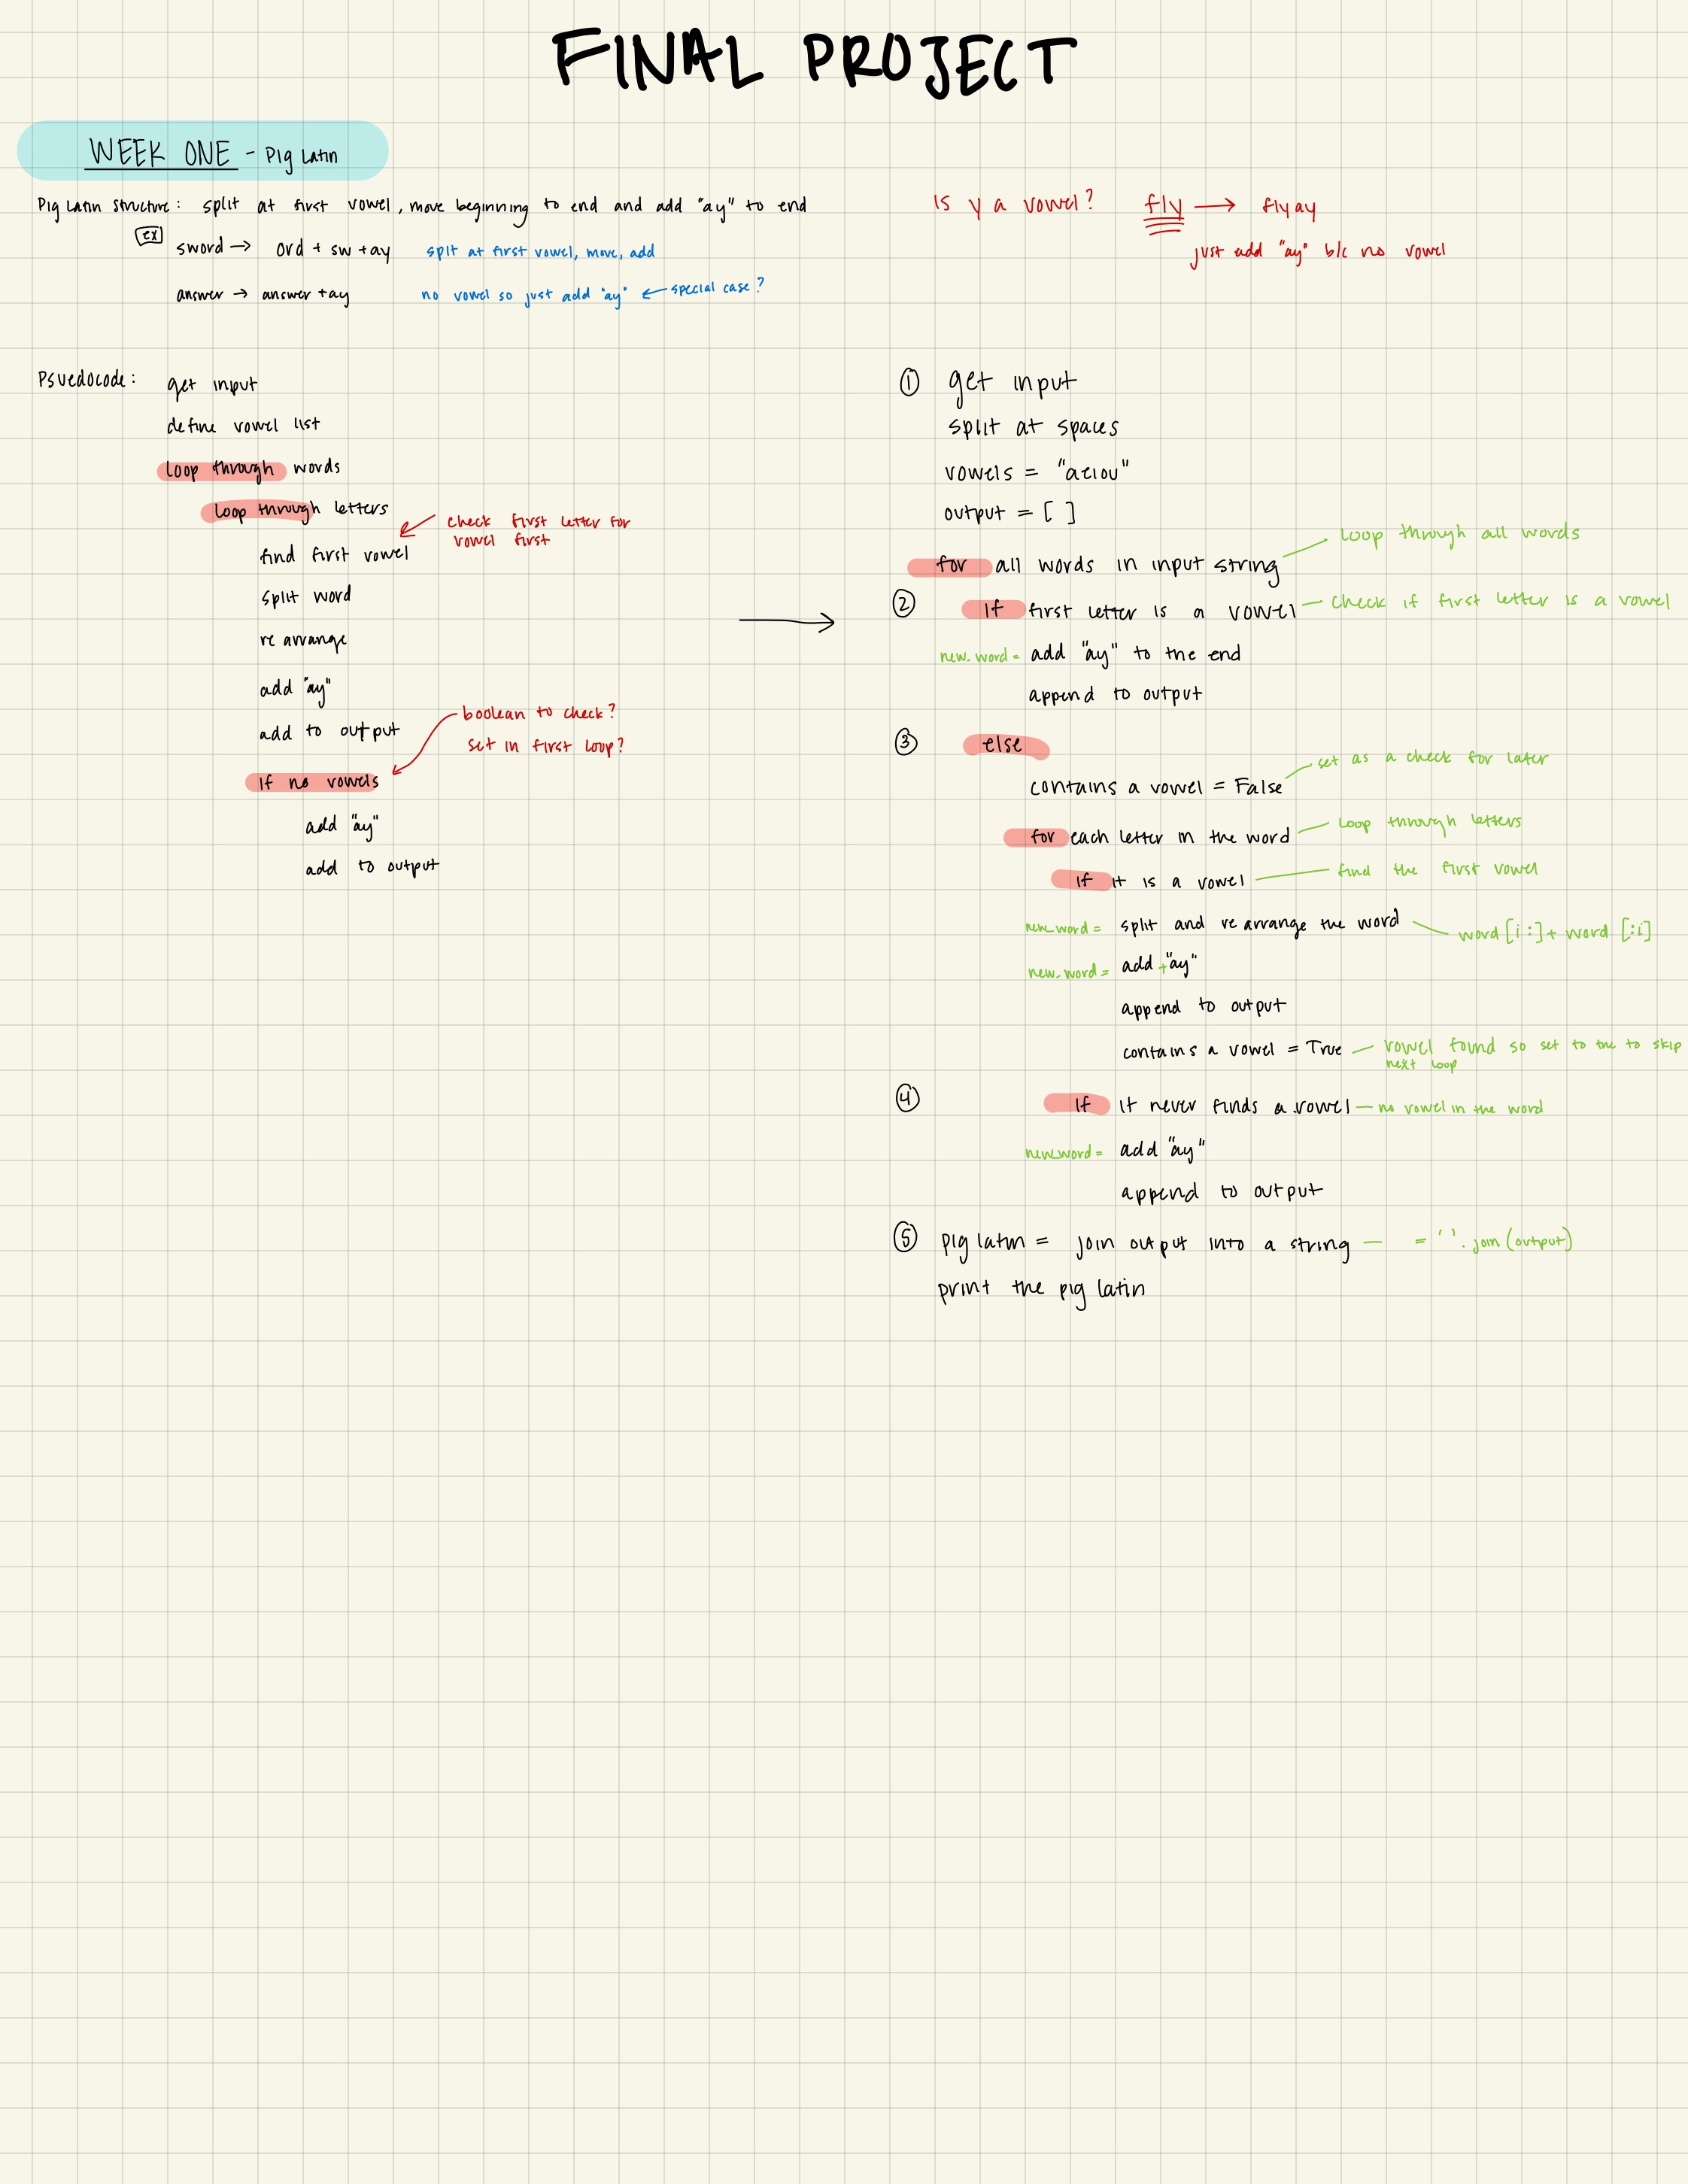

In [ ]:
# get input
sentence = input('enter a word or phrase: ').lower()

words = sentence.split()
vowels = 'aeiou'

output = []

#loop through all the words entered in the phrase
for word in words:

  #if the first letter is a vowel add "ay" to the end
  if word[0] in vowels:
    new_word = word+"ay"
    output.append(new_word)

  #if the first letter is not a vowel get the position of the first vowel
  #then add the letters before to the end and add "ay"
  else:
    #set as a holder before checking all letter for a vowel
    contains_vowel = False

    for i, letter in enumerate(word):
      if letter in vowels:
        new_word = word[i:] + word[:i] + "ay"
        output.append(new_word)

        #if there is a vowel change the boolean and break out
        contains_vowel = True
        break

    #if there is no vowel in the word just add "ay"
    if contains_vowel==False:
      new_word = word+"ay"
      output.append(new_word)

#join the output as a string
pig_latin = ' '.join(output)
print("Pig Latin: ", pig_latin)

enter a word or phrase: this is a message
Pig Latin:  isthay isay aay essagemay


# **WEEK TWO**

**Objective: Implement a New Cipher**

Find a different cipher than the ones we discussed in class. Write a program that encrypts and decrypts using that cipher.. Then, make an attempt to brute force your cipher (perhaps check that it can be brute forced before actually trying because #efficiency). Submit that code separately.

The final submission should let the user select to decrypt or encrypt, and provide space to input the relevant message and keys (as appropriate). The brute force code should occupy a separate cell.

**CIPHER:** [rail fence cipher](https://crypto.interactive-maths.com/rail-fence-cipher.html)

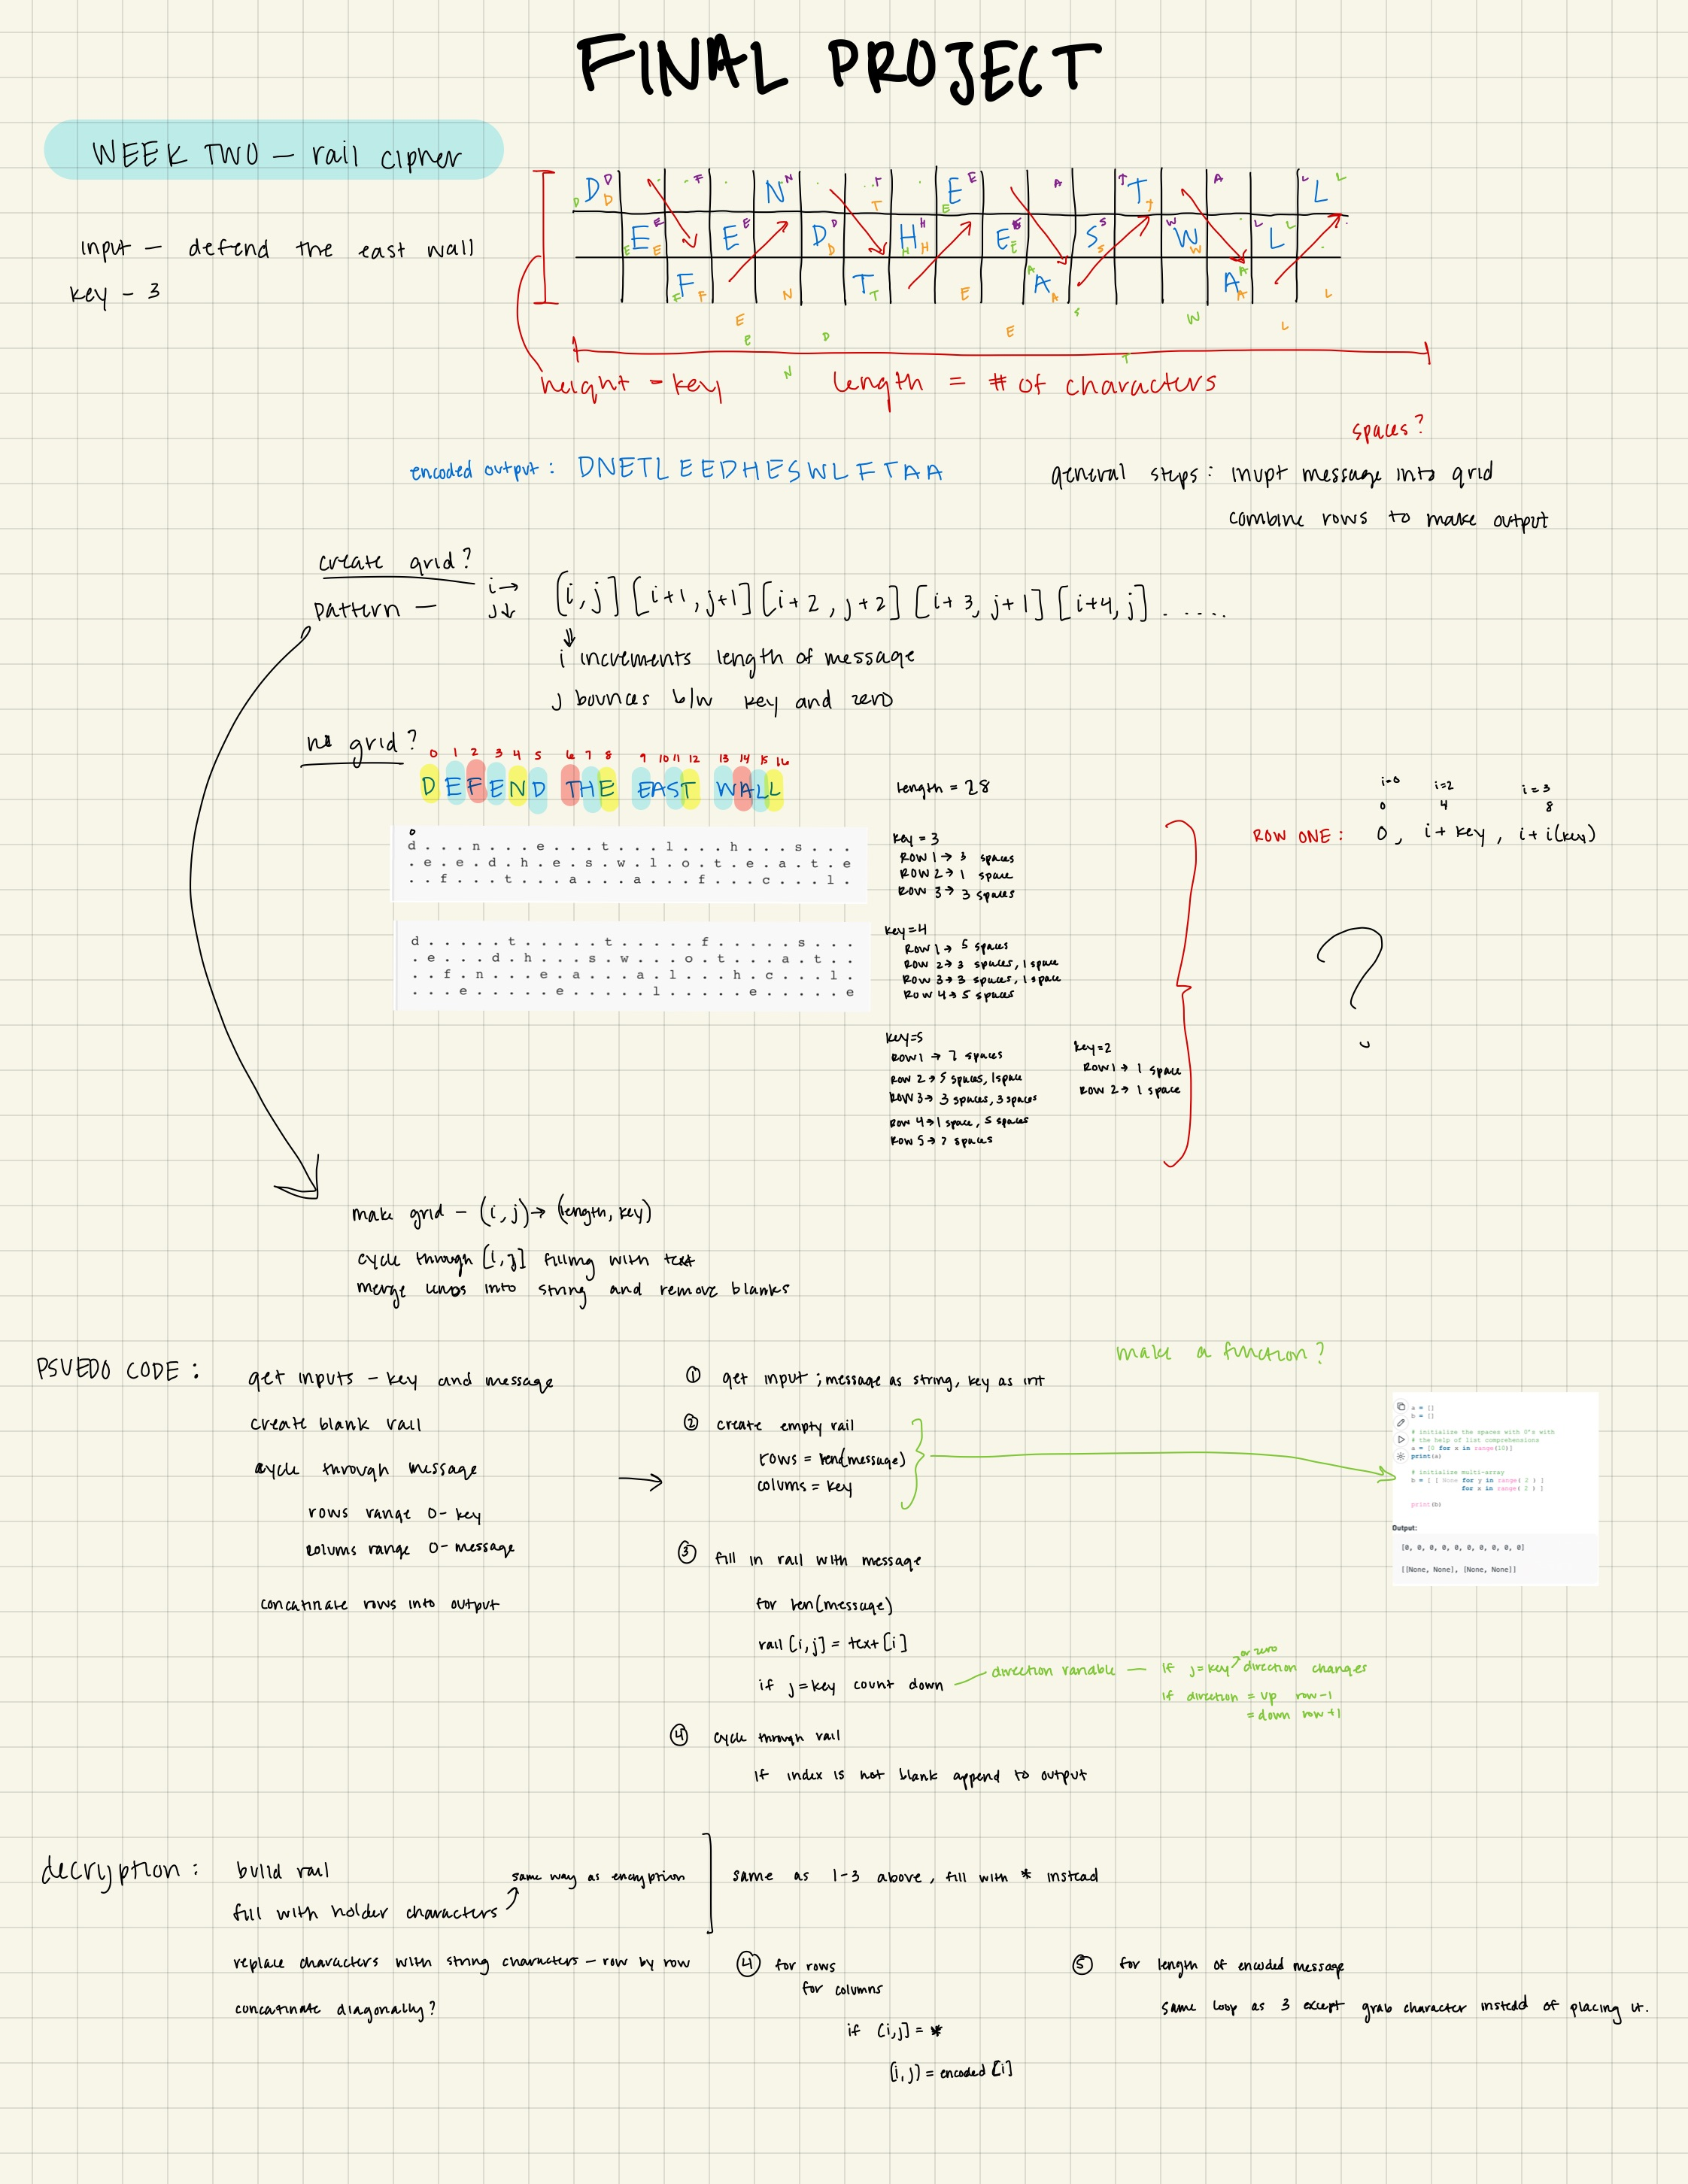

In [ ]:
def encryptRailFence(message, key):
 
    # create the rail
    rail = [['\n' for i in range(len(message))]
                  for j in range(key)]
     
    # find the direction of column movement
    direction_down = False
    row = 0
    col = 0
     
    for letter in range(len(message)):
        # check the direction of flow and reverse the direction if at the top or bottom
        if (row == 0) or (row == key - 1):
            direction_down = not direction_down
         
        # fill the rail with letter
        rail[row][col] = message[letter]
        # move to the next column
        col += 1
        # move the next row
        if direction_down:
            row += 1
        else:
            row -= 1

    # combine the rails into a message
    encoded_message = []
    for i in range(key):
        for j in range(len(message)):
            if rail[i][j] != '\n':
                encoded_message.append(rail[i][j])
    return("" . join(encoded_message))
     

In [ ]:
def decryptRailFence(message, key):
 
    rail = [['\n' for i in range(len(message))]
                  for j in range(key)]
     
    dir_down = None
    row, col = 0, 0
     
    # fill the rail with '*'
    for i in range(len(message)):
        if (row == 0) or (row == key - 1):
            dir_down = not dir_down
        # place the marker
        rail[row][col] = '*'
        col += 1
        if dir_down:
            row += 1
        else:
            row -= 1
             
    # fill the rail with encrypted message
    index = 0
    for i in range(key):
        for j in range(len(message)):
            if ((rail[i][j] == '*') and (index < len(message))):
              rail[i][j] = message[index]
              index += 1
         
    # read the rail and combine
    decoded_message = []
    row, col = 0, 0
    dir_down = False
    for i in range(len(message)):

      #check the direction of flow
      if (row == 0) or (row == key - 1):
        dir_down = not dir_down
  
      #check for text and append
      if (rail[row][col] != '\n'): #and (i < len(message)):
        decoded_message.append(rail[row][col])
        col += 1

      if dir_down:
          row += 1
      else:
          row -= 1

    return("".join(decoded_message))

In [ ]:
#HACK IT

def hackRailFence(message):
  keys = [2, 3, 4, 5, 6, 7, 8, 9]
  for key in keys:
    decoded_option = decryptRailFence(message, key)
    print(decoded_option)


In [ ]:
en_or_de = int(input("Enter 1 for Encryption, 2 for Decryption, or 3 to Hack "))
message = input("Enter the Message: ")
# key = input("enter a key: ")
# key = int(key)

if en_or_de == 1:
  key = input("Enter a Key: ")
  key = int(key)
  encoded = encryptRailFence(message, key)
  print("your encoded message is:", encoded)

if en_or_de == 2:
  key = input("Enter a Key: ")
  key = int(key)
  decoded = decryptRailFence(encoded, key)
  print('your decoded message is:', decoded)

if en_or_de == 3:
  print('your message hacked:')
  print(hackRailFence(encoded))


Enter 1 for Encryption, 2 for Decryption, or 3 to Hack 3
Enter the Message: tsshi esi amaes g
your message hacked:
t sasmhaie se sgi
t eesssis  ahmgai
this is a message
thsm aiis  egsaes
ts im a ehsisaegs
ts imsg a ehsisae
ts iaasg em ehsis
tsieiaasg em s hs
None


# **WEEK** **THREE**

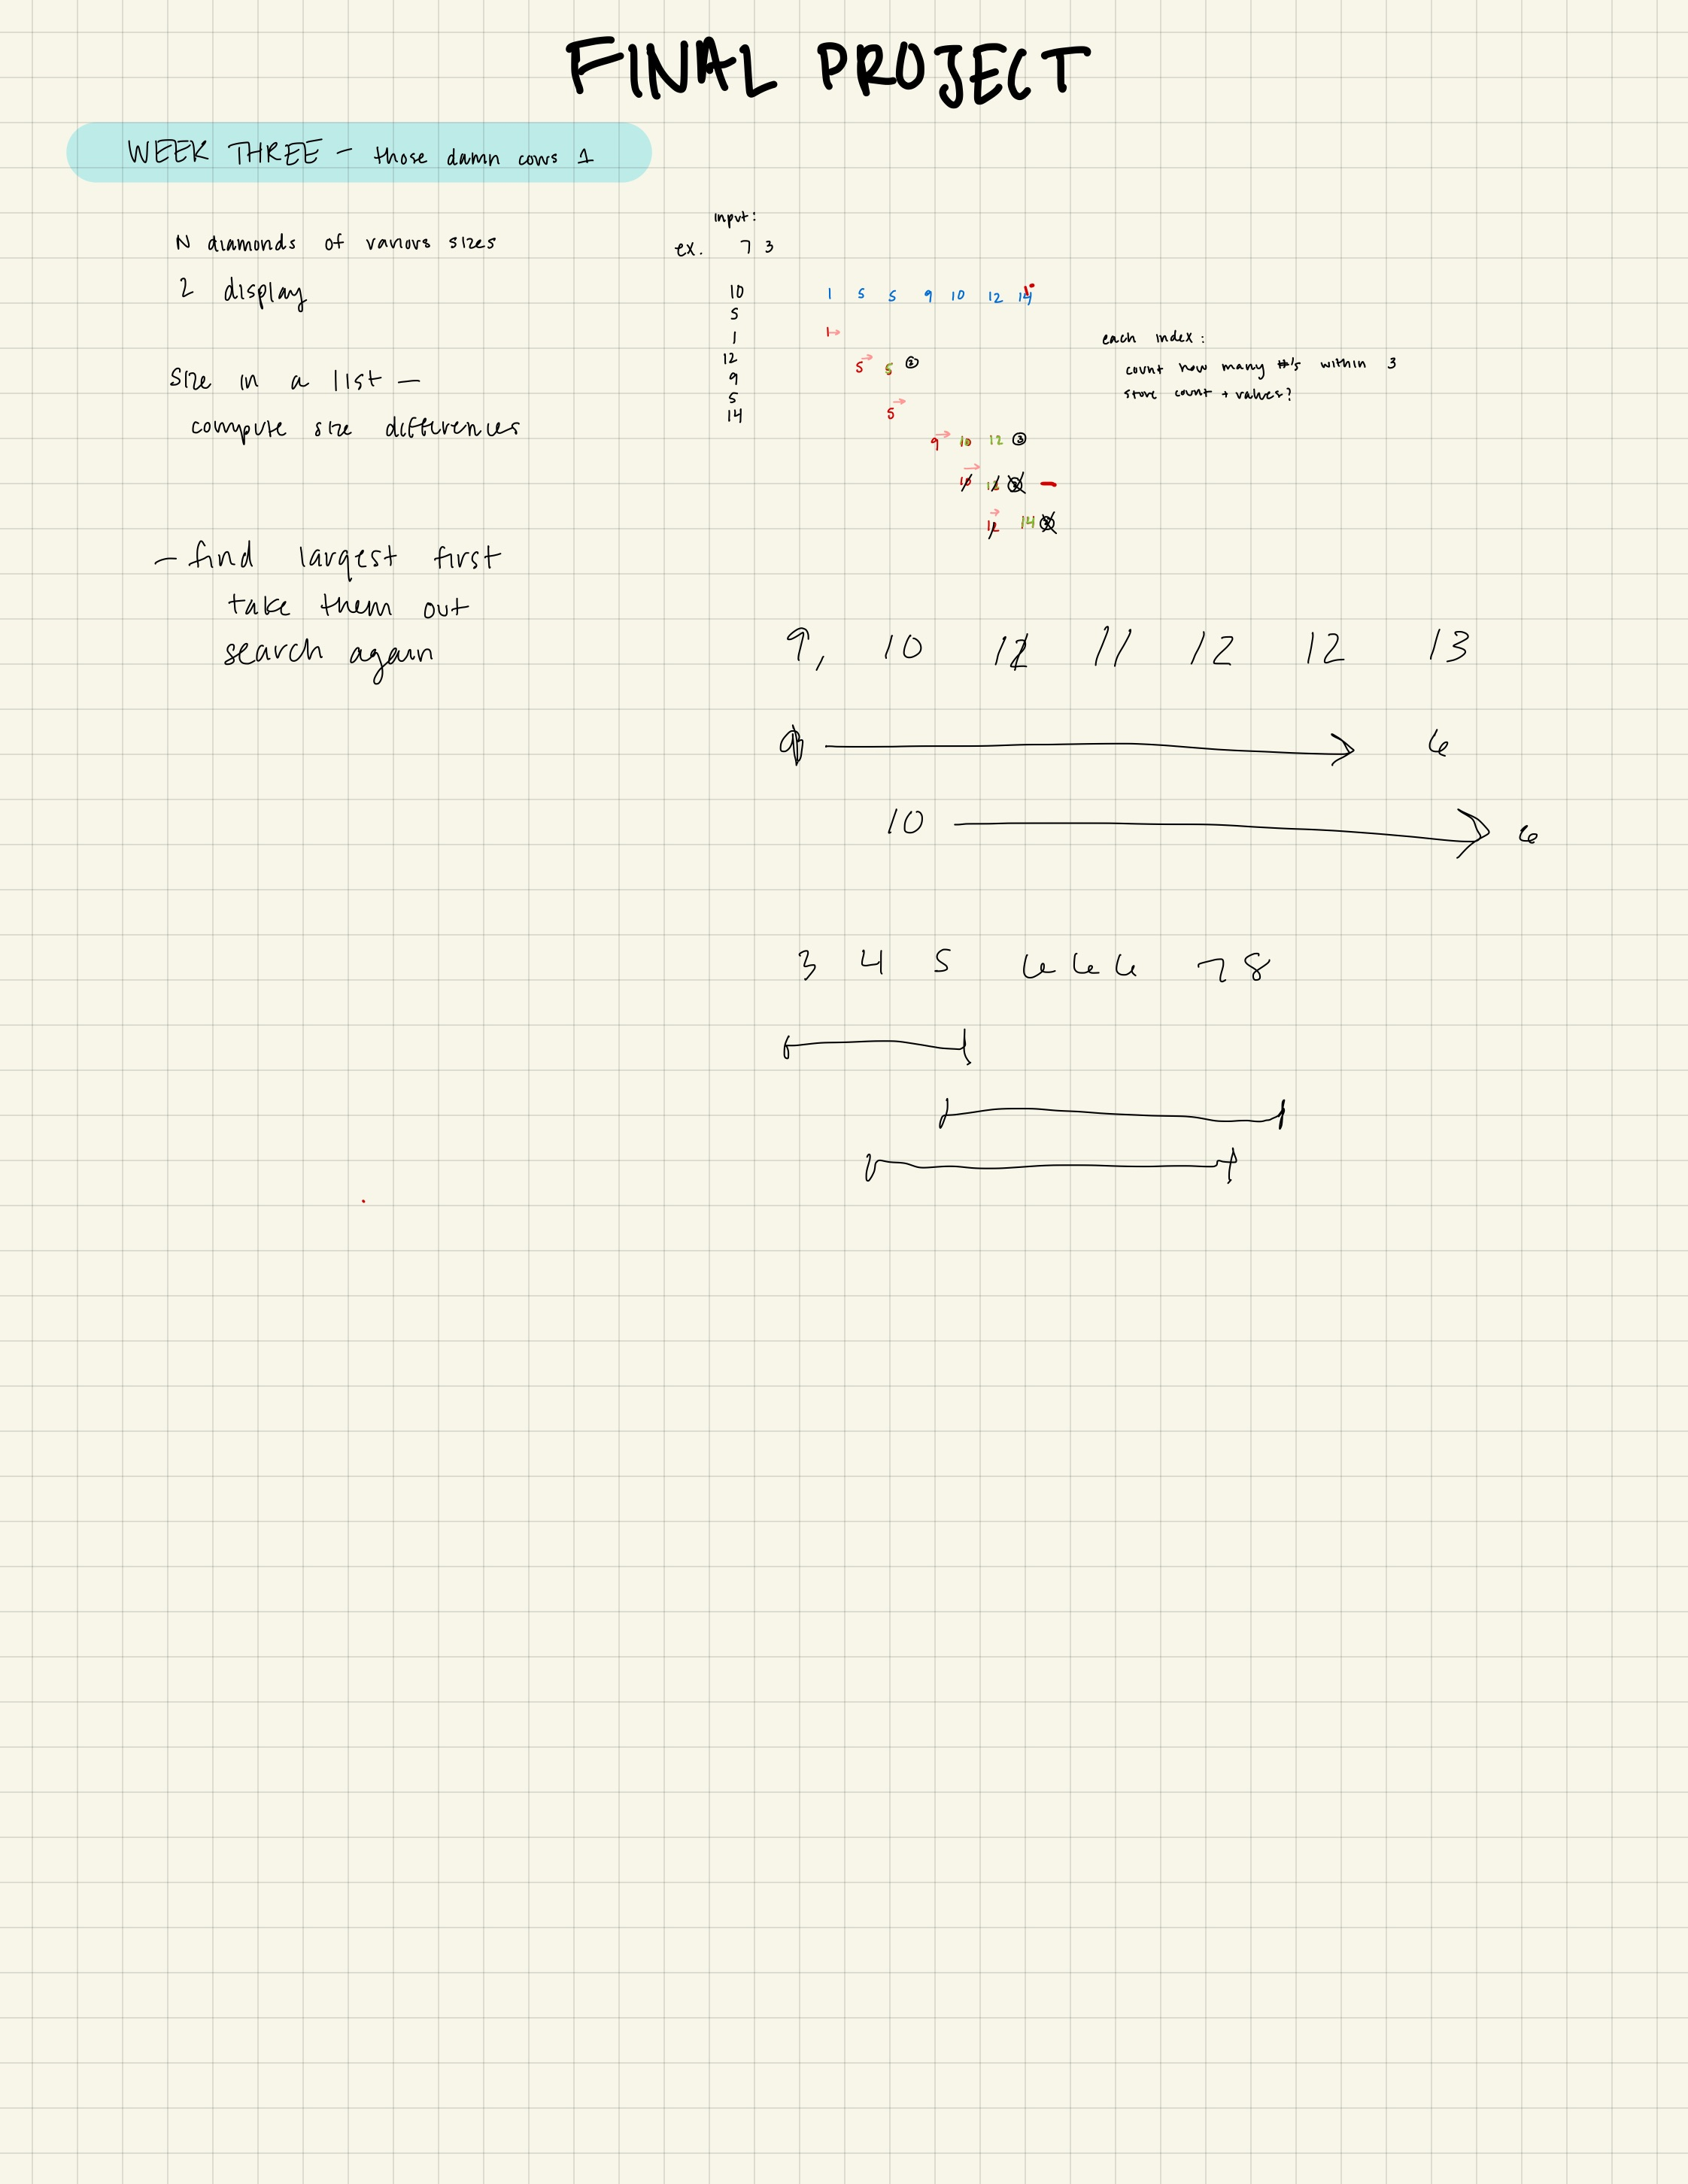

In [ ]:
#diamonds = [10, 5, 1, 14, 9, 5, 11]
#diamonds = [9, 10, 12, 11, 11, 12, 13]
diamonds = [1,3,4,9,8,8,10,11]

# sort the diamonds in the order of their weights
diamonds.sort()
number_diamonds = len(diamonds)
counter = 0
final_count = 0
k = 3

def find_diamonds(diamonds, k):
  # create a list to store the number of diamonds within 'k' of each diamond
  number_diamonds = len(diamonds)
  diamonds_count = []
  i = 0
  max = 0
  max_coordinates = []

  # loop through all diamonds
  for i in range(0, number_diamonds-1):
    #print ('i= ', i)
    counter = 0
    next_index = i
    #print(diamonds[i])
    #check to see how many diamonds weights fall within 'k' of the diamonds being checked
    while diamonds[i]+k >= diamonds[next_index+1] :
      counter += 1
      next_index += 1
      # check to see if you are at the last diamond, if so break out of the loop
      if next_index == number_diamonds - 1 :
        break
    # add the total number of diamonds within 'k' of the diamond being checked to the list of values for each diamond
    if counter > max:
      max = counter
      max_coordinates = [i, counter]
    diamonds_count.append(counter+1)
  
  return(max_coordinates, max+1)


#print(diamonds)
coords, count = find_diamonds(diamonds, k)
coords.sort()

del diamonds[coords[0]:coords[1]+coords[0]+1]

# for j in range(coords[0], coords[1]):
#   del diamonds[coords[0]]
#   print("j is",coords[j])
#   print(diamonds)

#print(diamonds)
final_count += count
coords1, count1 = find_diamonds(diamonds, k)
final_count += count1

print("bessie can display",final_count,"diamonds")


bessie can display 8 diamonds
